In [125]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import print_function
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets # interactive controls in browser
from pylab import rcParams
rcParams['figure.figsize'] = 8,8

In [86]:
tweets_new = np.genfromtxt('../data/UK_tweets_ny2016_xy.csv',delimiter=',')

In [99]:
print(tweets_new)

[[ -2.54700000e-04   5.16078415e+01]
 [  2.55438000e-03   5.17671136e+01]
 [  3.02268000e-03   5.15606800e+01]
 ..., 
 [ -1.51868000e+00   5.24050484e+01]
 [ -1.53333000e+00   5.23000000e+01]
 [ -1.53577253e+00   5.22843306e+01]]


In [89]:
tweets_time = np.arange('2015-12-31T00Z', '2016-01-02T00Z', 30, dtype='datetime64[s]') # YYMMDD T00Z == midnight, [s] is seconds

In [90]:
tweets_time.shape

(5760,)

In [91]:
tweets = np.random.rand(len(tweets_time),2)

In [104]:
print(tweets)

[[ 0.23867564  0.28372402]
 [ 0.94449651  0.34540083]
 [ 0.2002826   0.52405049]
 ..., 
 [ 0.78880043  0.25143603]
 [ 0.96563199  0.98388573]
 [ 0.07633397  0.43234257]]


In [51]:
tweets_lon = tweets[:,0]*180-90

In [52]:
tweets_lat = tweets[:,1]*360-180

In [53]:
tweets=np.array([tweets_lon,tweets_lat,tweets_time]).transpose() # transpose to get it in correct orientation

In [54]:
tweets[:,0]

array([2.663503951330185, -67.69071751139069, -5.868664151368577, ...,
       81.63486852076534, -32.9432621203958, 34.59717362346926], dtype=object)

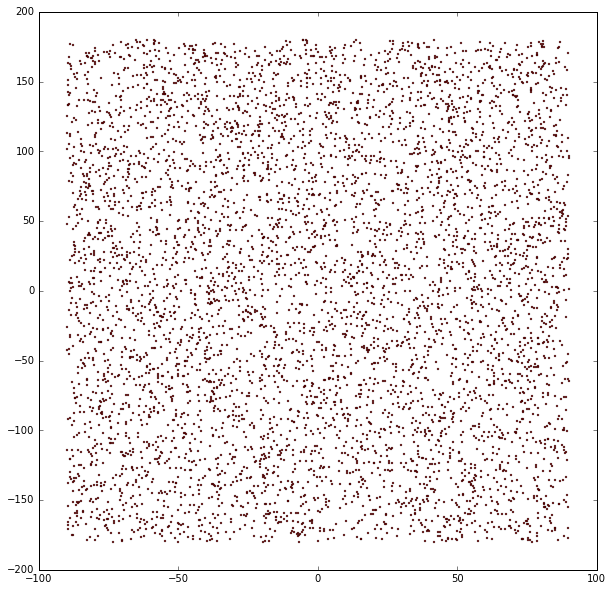

In [55]:
plt.plot(tweets_lon,tweets_lat,'ro',markersize=1.8)

In [56]:
len(tweets)

5760

In [139]:
from mpl_toolkits.basemap import Basemap

In [141]:
datebins=856

In [109]:
def tweet_merc(i=0):
    my_map=Basemap(projection='merc', resolution='c',
                  lat_0=0,lon_0=0,
                  llcrnrlon=-189,llcrnrlat=-80,
                  urcrnrlon=189,urcrnrlat=80)

    my_map.drawcoastlines()

    my_map.drawcountries()
    my_map.fillcontinents(color='gray',lake_color='b')

    my_map.drawmapboundary()

    my_map.drawmeridians(np.arange(0,360,15))
    my_map.drawparallels(np.arange(-90,90,30))
    
    lon=tweets_new[0:i,0]
    lat=tweets_new[0:i,1]

    x,y=my_map(lon,lat)
    my_map.plot(x,y,'ro',markersize=6)
    
    plt.show()


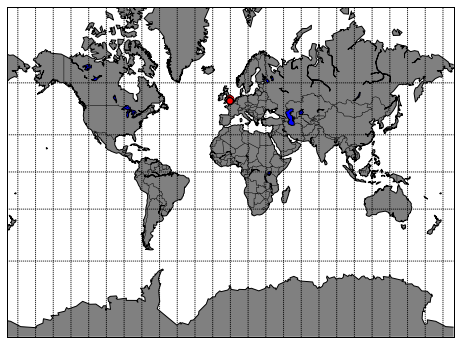

In [142]:
interact(tweet_merc,i=(0,datebins,10))

In [136]:
def tweet_merc_uk(i=0):
    my_map=Basemap(projection='merc', resolution='l',
                  lat_0=0,lon_0=0,
                  llcrnrlon=-11,llcrnrlat=49,
                  urcrnrlon=6,urcrnrlat=62)

    my_map.drawcoastlines()

    my_map.drawcountries()
    my_map.fillcontinents(color='gray',lake_color='b')

    my_map.drawmapboundary()

    my_map.drawmeridians(np.arange(0,360,15))
    my_map.drawparallels(np.arange(-90,90,30))
    
    lon=tweets_new[0:i,0]
    lat=tweets_new[0:i,1]

    x,y=my_map(lon,lat)
    my_map.plot(x,y,'ro',markersize=6)
    
    plt.show() 
    

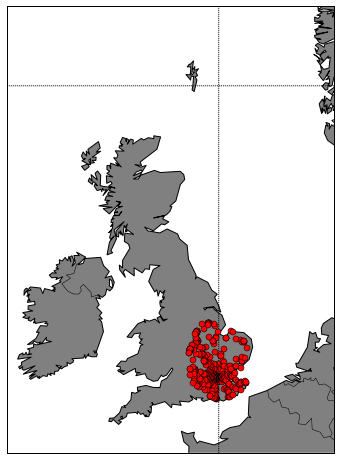

In [143]:
interact(tweet_merc_uk,i=(0,datebins,10))